# Análise de Dados Exploratória do Titanic

# 1. Introdução
O RMS Titanic foi um navio de passageiros britânico operado pela empresa White Star Line que afundou no Oceano Atlântico Norte nas primeiras horas da manhã de 15 de abril de 1912, depois de atingir um iceberg durante sua viagem inaugural de Southampton a Nova York. Dos 2.224 passageiros e tripulantes a bordo, mais de 1.500 morreram, tornando o naufrágio um dos desastres marítimos comerciais mais mortais da história moderna em tempos de paz.

Neste estudo iremos explorar um conjunto de dados baseado na lista de passageiros do Titanic editada por Michael A. Findlay, publicada originalmente em Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, e expandida com a ajuda da comunidade da Internet. Os arquivos HTML originais foram obtidos por Philip Hind (1999) e o dataset descreve o status de sobrevivência de passageiros individuais no Titanic. Ele não contém informações para a tripulação, mas contém idades atuais e estimadas para quase 80% dos passageiros.

## 1.1 Objetivos
O objetivo deste estudo é realizar uma Análise Exploratória dos Dados (Exploratory Data Analysis - EDA) do conjunto de dados titanic3, adaptado pelo autor e disponível em [data/titanic3.csv](https://github.com/profdiegoaugusto/analise-dados/blob/master/Pandas/titanic-eda/data/titanic3.csv) ; a fim de caracterizar o perfil dos sobreviventes do fatídico naufrágio. Especificiamente serão respondidas as seguintes questões de pesquisa:

1.   Qual é o número de Sobreviventes?
2.   Homens ou mulheres tiveram mais chances de sobreviver?
3.   Qual classe social teve mais sobreviventes?
4.   Qual faixa etária teve mais chances de sobreviver?


# 2. Metodologia
Nesta seção será apresentado todo o processo de preparação, organização e limpeza de dados feito no dataset que possui os seguintes dados:

## 2.1. Configuração do Ambiente

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image # Serve para colocar imagem (apagar) /n utilizado/

## 2.2. Leitura dos Dados

In [ ]:
url = 'https://github.com/profdiegoaugusto/analise-dados/blob/master/Pandas/titanic-eda/data/titanic3.csv'
dados_brutos = pd.read_html(url)

In [ ]:
#Passando para dataframe e excluindo coluna Unnamed
dados_brutos = pd.DataFrame = dados_brutos[0]
dados_brutos.pop("Unnamed: 0")

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1304   NaN
1305   NaN
1306   NaN
1307   NaN
1308   NaN
Name: Unnamed: 0, Length: 1309, dtype: float64

## 2.3. Organização e Limpeza dos Dados

### 2.3.1. Visão Geral do Conjunto de Dados

In [ ]:
dados_brutos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_passageiro,1309.0,655.000000,378.020061,1.0,328.0000,655.0000,982.000,1309.0000
classe,1309.0,2.294882,0.837836,1.0,2.0000,3.0000,3.000,3.0000
sobreviveu,1309.0,0.381971,0.486055,0.0,0.0000,0.0000,1.000,1.0000
idade,1046.0,29.897706,14.414973,0.0,21.0000,28.0000,39.000,80.0000
irmaos_conjuges,1309.0,0.498854,1.041658,0.0,0.0000,0.0000,1.000,8.0000
pais_filhos,1309.0,0.385027,0.865560,0.0,0.0000,0.0000,0.000,9.0000
tarifa,1308.0,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
corpo,121.0,160.809917,97.696922,1.0,72.0000,155.0000,256.000,328.0000


In [ ]:
dados_brutos.dtypes

id_passageiro        int64
classe               int64
sobreviveu           int64
nome                object
sexo                object
idade              float64
irmaos_conjuges      int64
pais_filhos          int64
bilhete             object
tarifa             float64
cabine              object
embarque            object
bote                object
corpo              float64
destino             object
dtype: object

In [ ]:
dados_brutos.isnull().sum()

id_passageiro         0
classe                0
sobreviveu            0
nome                  0
sexo                  0
idade               263
irmaos_conjuges       0
pais_filhos           0
bilhete               0
tarifa                1
cabine             1014
embarque              2
bote                823
corpo              1188
destino             564
dtype: int64

### 2.3.2 Remoção de Colunas

In [ ]:
#Excluindo colunas NOME, BILHETE, CABINE, DESTINO
df_titanic = dados_brutos.drop(["nome","bilhete","cabine","destino"], axis=1)

### 2.3.3. Dados Ausentes

In [ ]:
print('dados nulos: {}'.format(df_titanic.isnull().sum().sum()))
print(df_titanic.isnull().sum())

dados nulos: 2277
id_passageiro         0
classe                0
sobreviveu            0
sexo                  0
idade               263
irmaos_conjuges       0
pais_filhos           0
tarifa                1
embarque              2
bote                823
corpo              1188
dtype: int64


#### 2.3.3.1 Idades Ausentes

In [ ]:
print('Idade NaN(Entrada): {}'.format(df_titanic['idade'].isnull().sum()))
df_titanic[['idade']]  = df_titanic['idade'].fillna(df_titanic['idade'].mean())
print('Idade NaN(Saida): {}'.format(df_titanic['idade'].isnull().sum()))
df_titanic['idade'] = df_titanic['idade'].astype(int)

Idade NaN(Entrada): 263
Idade NaN(Saida): 0


In [ ]:
df_titanic['idade'].unique()

array([29,  1,  2, 30, 25, 48, 63, 39, 53, 71, 47, 18, 24, 26, 80, 50, 32,
       36, 37, 42, 19, 35, 28, 45, 40, 58, 22, 41, 44, 59, 60, 33, 17, 11,
       14, 49, 76, 46, 27, 64, 55, 70, 38, 51, 31,  4, 54, 23, 43, 52, 16,
       21, 15, 65, 56, 13, 61, 34,  6, 57, 62, 67, 12, 20,  8,  7,  3,  5,
       66,  9,  0, 10, 74])

#### 2.3.3.2 Tarifas Ausentes

In [ ]:
print('Falta Tarifa')
df_titanic[df_titanic['tarifa'].isnull()]

Falta Tarifa


,id_passageiro,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,tarifa,embarque,bote,corpo
1225,1226,3,0,male,61,0,0,NaN,S,NaN,261.0


In [ ]:
tarifas = df_titanic[(df_titanic['classe'] == 3)  & (df_titanic['sexo'] == 'male') & (df_titanic['idade'] >= 50) & (df_titanic['irmaos_conjuges'] == 0)  & (df_titanic['embarque'] == 'S')]
print('Passageiros com dados (Classe, Sexo, Idade, Embarque) semelhantes ao faltante: {}'.format(len(tarifas)))

Passageiros com dados (Classe, Sexo, Idade, Embarque) semelhantes ao faltante: 9


In [ ]:
df_titanic['tarifa'] = df_titanic['tarifa'].fillna(tarifas['tarifa'].mean())

In [ ]:
df_titanic.loc[df_titanic['id_passageiro'] == 1225]

,id_passageiro,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,tarifa,embarque,bote,corpo
1224,1225,3,0,male,21,0,0,8.05,S,NaN,NaN


#### 2.3.3.3 Portos de Embarque Ausentes

In [ ]:
df_titanic = df_titanic[df_titanic['embarque'].notna()]

#### Dados Ausentes

In [ ]:
print('dados nulos: {}'.format(df_titanic.isnull().sum().sum()))
print(df_titanic.isnull().sum())

dados nulos: 2009
id_passageiro         0
classe                0
sobreviveu            0
sexo                  0
idade                 0
irmaos_conjuges       0
pais_filhos           0
tarifa                0
embarque              0
bote                823
corpo              1186
dtype: int64


## 2.4 Mapeamento de Dados

In [ ]:
def modificado(coluna,origem):
    modificado = []
    if coluna == 'Classe':
        for coluna in origem:
            if coluna == 1:
                modificado.append('Alta')
            elif coluna == 2:
                modificado.append('Média')
            else:
                modificado.append('Baixa')
        return modificado
    elif coluna == 'Sexo':
        for coluna in origem:
            if coluna == 'male':
                modificado.append('M')
            else :
                modificado.append('F')
        return modificado
    else:
        for coluna in origem:
            if coluna == 'C':
                modificado.append('Cherbourg')
            elif coluna == 'Q':
                modificado.append('Queenstown')
            else:
                modificado.append('Southampton')
        return modificado

df_titanic['classe'] = modificado('Classe',df_titanic['classe'])
df_titanic['sexo'] = modificado('Sexo',df_titanic['sexo'])
df_titanic['embarque'] = modificado('Embarque',df_titanic['embarque'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
df_titanic

,id_passageiro,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,tarifa,embarque,bote,corpo
0,1,Alta,1,F,29,0,0,211.3375,Southampton,2,NaN
1,2,Alta,1,M,1,1,2,151.5500,Southampton,11,NaN
2,3,Alta,0,F,2,1,2,151.5500,Southampton,NaN,NaN
3,4,Alta,0,M,30,1,2,151.5500,Southampton,NaN,135.0
4,5,Alta,0,F,25,1,2,151.5500,Southampton,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,Baixa,0,F,15,1,0,14.4542,Cherbourg,NaN,328.0
1305,1306,Baixa,0,F,29,1,0,14.4542,Cherbourg,NaN,NaN
1306,1307,Baixa,0,M,27,0,0,7.2250,Cherbourg,NaN,304.0
1307,1308,Baixa,0,M,27,0,0,7.2250,Cherbourg,NaN,NaN


## 2.5. Feature Engineering

In [ ]:
df_titanic['total_parentes'] = df_titanic['irmaos_conjuges'] + df_titanic['pais_filhos']
#df_titanic['faixa_etaria'] = df_titanic['faixa_etaria'] + df_titanic['faixa_etaria']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 2.5.1 Total de Parentes

In [ ]:
df_titanic['total_parentes'].head()

0    0
1    3
2    3
3    3
4    3
Name: total_parentes, dtype: int64

### 2.5.2 Faixas Etárias

In [ ]:
def faixa(df):
    idade = []
    for dados in df: 
        if dados <= 12:
            idade.append('Criança')
        elif (dados > 12) & (dados < 18):
            idade.append('Adolecente')
        elif (dados >= 18) & (dados < 60):
            idade.append('Adulto')
        else:
            idade.append('Idoso')
    return idade
faixa = faixa(df_titanic['idade'])
df_titanic['faixa_etaria'] = faixa

In [ ]:
df_titanic.sample(20)

,id_passageiro,classe,sobreviveu,sexo,idade,irmaos_conjuges,pais_filhos,tarifa,embarque,bote,corpo,total_parentes,faixa_etaria
1278,1279,Baixa,0,M,20,0,0,7.8542,Southampton,NaN,NaN,0,Adulto
881,882,Baixa,1,M,21,0,0,7.7958,Southampton,A,NaN,0,Adulto
788,789,Baixa,0,M,45,0,0,6.9750,Southampton,NaN,NaN,0,Adulto
745,746,Baixa,1,F,30,0,0,6.9500,Queenstown,15,NaN,0,Adulto
1162,1163,Baixa,1,M,29,0,0,7.7500,Queenstown,14,NaN,0,Adulto
486,487,Média,0,M,24,0,0,10.5000,Southampton,NaN,108.0,0,Adulto
1135,1136,Baixa,0,M,29,0,0,7.8958,Southampton,NaN,NaN,0,Adulto
1153,1154,Baixa,0,F,47,1,0,14.5000,Southampton,NaN,7.0,1,Adulto
258,259,Alta,1,F,30,0,0,31.0000,Cherbourg,4,NaN,0,Adulto
815,816,Baixa,0,M,29,0,0,14.5000,Southampton,NaN,NaN,0,Adulto


# 3. Análise dos Dados

## 3.1. Qual é o número de Sobreviventes?

In [ ]:
sobrevivente = df_titanic['sobreviveu'].sum()
total = len(df_titanic)
porcentagem = int(sobrevivente*100/total)

Total de Sobreviventes 498 (38%) de 1307 pessoas


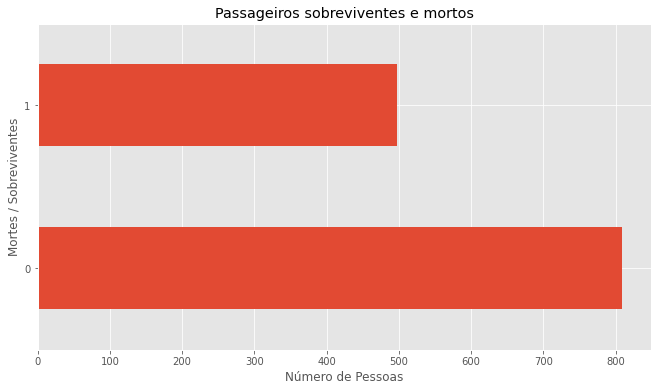

In [ ]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(11,6))
fig = df_titanic['sobreviveu'].value_counts().plot.barh()
fig.set_title('Passageiros sobreviventes e mortos')
fig.set_ylabel('Mortes / Sobreviventes')
fig.set_xlabel('Número de Pessoas')
print('Total de Sobreviventes {} ({}%) de {} pessoas'.format(sobrevivente,porcentagem, total))

## 3.2. Homens ou mulheres tiveram mais chances de sobreviver?

In [ ]:
df_sobrevivente = df_titanic.loc[(df_titanic['sobreviveu'] == 1 )]
df_sobrevivente = df_sobrevivente['sexo'].value_counts() 
sum = df_sobrevivente.sum()
a = df_sobrevivente[0]*100/sum
b = df_sobrevivente[1]*100/sum

In [ ]:
print('Total Sobreviventes: {} (100%)'.format(sum))
print('Sobreviventes Femininos: {} ({}%)'.format(df_sobrevivente[0], round(a,2)))
print('Sobreviventes Masculinos: {} ({}%)'.format(df_sobrevivente[1], round(b,2)))
print('Conclusão que mulheres tiveram o dobro de chance de sobreviver')

Total Sobreviventes: 498 (100%)
Sobreviventes Femininos: 337 (67.67%)
Sobreviventes Masculinos: 161 (32.33%)
Conclusão que mulheres tiveram o dobro de chance de sobreviver


## 3.3. Qual classe social teve mais sobreviventes?

In [ ]:
df_sobrevivente = df_titanic.loc[(df_titanic['sobreviveu'] == 1 )]
df_sobrevivente = df_sobrevivente['classe'].value_counts() 
sum = df_sobrevivente.sum()
a = df_sobrevivente[0]*100/sum
b = df_sobrevivente[1]*100/sum
c = df_sobrevivente[2]*100/sum
df_sobrevivente

Alta     198
Baixa    181
Média    119
Name: classe, dtype: int64

In [ ]:
print('Total Sobreviventes: {} (100%)'.format(sum))
print('Sobreviventes classe Alta: {} ({}%)'.format(df_sobrevivente[0], round(a,2)))
print('Sobreviventes classe Baixa: {} ({}%)'.format(df_sobrevivente[1], round(b,2)))
print('Sobreviventes classe média: {} ({}%)'.format(df_sobrevivente[2], round(c,2)))

Total Sobreviventes: 498 (100%)
Sobreviventes classe Alta: 198 (39.76%)
Sobreviventes classe Baixa: 181 (36.35%)
Sobreviventes classe média: 119 (23.9%)


## 3.4. Qual faixa etária teve mais chances de sobreviver?

In [ ]:
df_sobrevivente = df_titanic.loc[(df_titanic['sobreviveu'] == 1 )]
print(len(df_sobrevivente))
df_sobrevivente['faixa_etaria'].value_counts()

498


Adulto        406
Criança        54
Adolecente     27
Idoso          11
Name: faixa_etaria, dtype: int64